<a href="https://colab.research.google.com/github/gojo5t5/architecture-blog-web/blob/main/vip_dolphin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Playing around with some options

In [1]:
from google.colab import files
uploaded = files.upload()

In [2]:
# Generate the spectrograms for the wav files
# https://stackoverflow.com/questions/44787437/how-to-convert-a-wav-file-to-a-spectrogram-in-python3

import os
import matplotlib.pyplot as plt

#for loading and visualizing audio files
import librosa
import librosa.display

#to play audio
import IPython.display as ipd

x, sr = librosa.load("sel3.wav", sr=44100)

plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

X = librosa.stft(x, n_fft=512) # Applying fourier transform
Xdb = librosa.amplitude_to_db(abs(X)) # Converts amplitude spectrogram to dB-scaled spec
fig = plt.figure(figsize=(14, 5)) # specifying the size of the figure
#librosa.display.specshow(Xdb, cmap='gray_r', sr=sr, x_axis='time', y_axis='hz')
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

#Log transformation - https://www.kaggle.com/msripooja/steps-to-convert-audio-clip-to-spectrogram
#plt.figure(figsize=(14, 5))
#librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
#plt.colorbar()

#Redrawing it without the axis and colourbar
fig = plt.figure(frameon=False)
fig.set_size_inches(14,5)
ax = plt.Axes(fig, [0., 0., 1., 1.])
ax.set_axis_off()
fig.add_axes(ax)
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

#Saving the file
fig.savefig("saved_spectrogram.png")

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py", line 149, in load
    with sf.SoundFile(path) as sf_desc:
  File "/usr/local/lib/python3.7/dist-packages/soundfile.py", line 629, in __init__
    self._file = self._open(file, mode_int, closefd)
  File "/usr/local/lib/python3.7/dist-packages/soundfile.py", line 1184, in _open
    "Error opening {0!r}: ".format(self.name))
  File "/usr/local/lib/python3.7/dist-packages/soundfile.py", line 1357, in _error_check
    raise RuntimeError(prefix + _ffi.string(err_str).decode('utf-8', 'replace'))
RuntimeError: Error opening 'sel3.wav': System error.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-2-f51ecec593a4>", line 14, in <module>
    x, sr = librosa.

TypeError: ignored

# Writing python code to generate images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#!ls "/content/drive/My Drive"

KeyboardInterrupt: ignored

In [ ]:
# Generate the spectrograms for the wav files
# https://stackoverflow.com/questions/44787437/how-to-convert-a-wav-file-to-a-spectrogram-in-python3

import os
import shutil
import matplotlib.pyplot as plt
import librosa
import librosa.display

starting_dir_path = '/content/drive/My Drive/common/'
image_folder_name = '/content/drive/My Drive/common_images/'

def save_spectrogram_image(file_path, image_name, sampling_rate=192000, fft_value=512):
  """<insert here>"""
  x, sr = librosa.load(file_path, sr=sampling_rate)

  # Drawing image
  X = librosa.stft(x, n_fft=512) # Applying fourier transform
  Xdb = librosa.amplitude_to_db(abs(X)) # Converts amplitude spectrogram to dB-scaled spec
  fig = plt.figure(frameon=False)
  fig.set_size_inches(14,5)
  ax = plt.Axes(fig, [0., 0., 1., 1.])
  ax.set_axis_off()
  fig.add_axes(ax)
  librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')

  #Saving image
  fig.savefig(os.path.join(image_folder_name, image_name + ".png"))
  plt.close(fig)

In [ ]:
# FS-dependent code
def find_clips_local(root_path):
  """<insert here>"""
  #Assuming they're all directories
  for sub_dir_name in os.listdir(root_path):
    print("Starting  - " + sub_dir_name + " ------------")
    input()
    path_to_wavs = os.path.join(root_path, sub_dir_name, 'Wav')
    for wavfile in os.listdir(path_to_wavs):
      if wavfile.endswith('.txt'): # Selection tables
        continue
      yield os.path.join(path_to_wavs, wavfile)
    print("Finished  -----------------------------------")

def find_clips_moby(root_path):
  """<insert here>"""
  for file_name in os.listdir(root_path):
    print("Starting  - " + file_name + " ------------")
    yield os.path.join(root_path, file_name)
  print("Finished  -----------------------------------")

def create_storage_for_images(directory_to_store_images):
  """<insert here>"""
  if os.path.exists(directory_to_store_images):
    shutil.rmtree(directory_to_store_images)
  os.makedirs(directory_to_store_images)

# Main code
create_storage_for_images(image_folder_name);
counter = 1
for clip_path in find_clips_moby(starting_dir_path):
  #print("Loop path : " + clip_path)
  save_spectrogram_image(clip_path, str(counter))
  counter += 1
print("All images have been created")

Starting  - Annotation51.wav ------------
Starting  - Annotation72.wav ------------
Starting  - Annotation28.wav ------------
Starting  - Annotation63.wav ------------
Starting  - Annotation74.wav ------------
Starting  - Annotation50.wav ------------
Starting  - Annotation1.wav ------------
Starting  - Annotation54.wav ------------
Starting  - Annotation30.wav ------------
Starting  - Annotation57.wav ------------
Starting  - Annotation65.wav ------------


KeyboardInterrupt: ignored

##Issues with creating images and the datasets
- QX-Dc-FLIP0610-VLA-061015-163500.wav: I can hear whistles but not sure why only one annotation is being created; maybe the annotations are shorter than 1.1s => Should I remove the restriction?

- Check that the images generated by the program match with the ones stored on Google Drive

- The first two folders of clips in common/ are Low Quality, most of the TAT11's are

- Need to create the images using *grey cmap* as well - check notebook to see what Doug said we needed to change at the last meeting

- Bash command: let COUNTER=0;for file in */*.png; do mv $file $COUNTER".png"; let COUNTER=COUNTER+1;done

- To remove directories: find -mindepth 1 -maxdepth 1 -type d -exec rm -r {} \;



# Creating a simple CNN using Keras and Tensorflow:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!ls "/content/drive/My Drive"

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL # For working with images in Python
import pathlib # Used to interact with files

import tensorflow as tf
import tensorflow_hub as hub 
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping
from tensorflow.keras import layers, models # For specifying the type of layer (Dense)
from tensorflow.keras.models import Sequential 

from sklearn.metrics import classification_report

In [ ]:
IMAGE_SHAPE = (1400,500)
  
TRAINING_DATA_DIR = '/content/drive/MyDrive/images_dataset_googledrive/train/'
TEST_DATA_DIR = '/content/drive/MyDrive/images_dataset_googledrive/test/'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=.20
) #https://stackoverflow.com/questions/42443936/keras-split-train-test-set-when-using-imagedatagenerator

train_generator = train_datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    subset="training",
    shuffle=True,
    target_size=IMAGE_SHAPE
)

validation_generator = train_datagen.flow_from_directory(
    TRAINING_DATA_DIR,
    subset="validation",
    shuffle=True,
    target_size=IMAGE_SHAPE
)

test_generator = ImageDataGenerator(
                    rescale=1./255
                ).flow_from_directory(
                      TEST_DATA_DIR,
                      shuffle=True,
                      target_size=IMAGE_SHAPE
                      )

Found 1922 images belonging to 3 classes.
Found 480 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


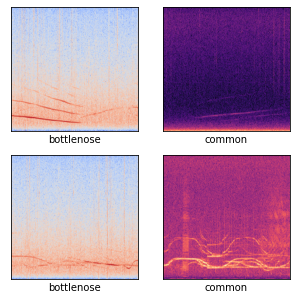

In [ ]:
# Visualise the data
images = iter(train_generator[0][0]) 
labels = iter(train_generator[0][1])

classes = dict((v,k) for k,v in (train_generator.class_indices).items())

fig, ax = plt.subplots(2,2, figsize=(5,5))
for sp in ax.reshape(-1):
  sp.set_xticks([])
  sp.set_yticks([])
  sp.imshow(next(images), aspect='auto')
  label_index = np.where(next(labels)==1)[0][0]
  sp.set_xlabel(classes.get(label_index))
plt.show()







Returns: ImageDataGenerator
A DirectoryIterator yielding tuples of (x, y) where x is a numpy array containing a batch of images with shape (batch_size, *target_size, channels) and y is a numpy array of corresponding labels.

In [ ]:
print("Shape of images : ", train_generator[0][0].shape)
model = models.Sequential()
# (3,3) = kernel size
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(1400, 500, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2))) # 32 filters
model.add(layers.Conv2D(16, (3, 3), activation='relu')) # 64 filters
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu')) # 128 filters
model.add(BatchNormalization())
# Adding fully connected layers
model.add(layers.Flatten()) # From a 3D tensor to a 1D
model.add(layers.Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dense(3, activation="softmax"))

model.summary()

Shape of images :  (32, 1400, 500, 3)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1398, 498, 16)     448       
_________________________________________________________________
batch_normalization (BatchNo (None, 1398, 498, 16)     64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 699, 249, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 697, 247, 16)      2320      
_________________________________________________________________
batch_normalization_1 (Batch (None, 697, 247, 16)      64        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 348, 123, 16)      0         
_________________________________________________________________
conv2d_2 (Conv2D) 

In [ ]:
# Initialising the model
print("[INFO] compiling model...")
model.compile(optimizer='adam',
              loss="categorical_crossentropy",
              metrics=['accuracy'])

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
NUM_EPOCHS = 10
es = EarlyStopping('val_loss', mode = 'min',verbose=1, patience = 5)

# Training the network
print("[INFO] training network for {} epochs...".format(
	NUM_EPOCHS))
history = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=NUM_EPOCHS,
                    callbacks=[es]
)

[INFO] compiling model...
[INFO] training network for 10 epochs...
Epoch 1/10
60/60 [==============================] - 1395s 23s/step - loss: 0.6500 - accuracy: 0.8183 - val_loss: 1.0508 - val_accuracy: 0.5604
Epoch 2/10
60/60 [==============================] - 1269s 21s/step - loss: 0.3721 - accuracy: 0.8634 - val_loss: 1.5798 - val_accuracy: 0.4458
Epoch 3/10
60/60 [==============================] - 1270s 21s/step - loss: 0.2466 - accuracy: 0.8991 - val_loss: 2.0824 - val_accuracy: 0.4146
Epoch 4/10
60/60 [==============================] - 1275s 21s/step - loss: 0.1497 - accuracy: 0.9617 - val_loss: 2.9082 - val_accuracy: 0.3667
Epoch 5/10
60/60 [==============================] - 1268s 21s/step - loss: 0.1303 - accuracy: 0.9498 - val_loss: 3.2050 - val_accuracy: 0.3938
Epoch 6/10
60/60 [==============================] - 1262s 21s/step - loss: 0.0590 - accuracy: 0.9894 - val_loss: 3.3037 - val_accuracy: 0.4250
Epoch 00006: early stopping


[INFO] evaluating network...
19/19 - 178s - loss: 3.0366 - accuracy: 0.4783
----- Evaluation Summary statistics -----
Test accuracy =  0.47833332419395447
Test loss =  0.47833332419395447


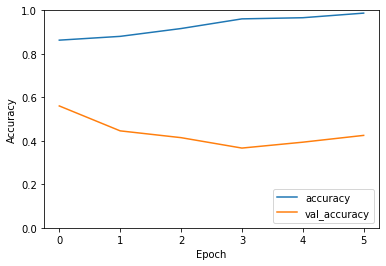

In [ ]:
# Evalutate the network - use validation set
print("[INFO] evaluating network...")

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_generator, verbose=2) # Check the return values for this

# SUMMARY STATISTICS
print("----- Evaluation Summary statistics -----")
print("Test accuracy = ", test_acc)
print("Test loss = ", test_acc)

In [ ]:
print("[INFO] Predict with network...")
model = keras.models.load_model('/content/drive/MyDrive/16_03_2021_basic_classifier.model')
test_generator.reset()
test_labels = test_generator.classes
array_of_class_names = np.array(list(classes.values()))
y_hat = model.predict(test_generator)
print(classification_report(test_labels,y_hat.argmax(axis=1), target_names=array_of_class_names))

[INFO] Predict with network...
              precision    recall  f1-score   support

  bottlenose       0.00      0.00      0.00       200
      common       0.35      0.55      0.42       200
melon-headed       0.33      0.47      0.39       200

    accuracy                           0.34       600
   macro avg       0.23      0.34      0.27       600
weighted avg       0.23      0.34      0.27       600



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Display predicted output and actual classification

In [ ]:
# Save the trained model 
# -> could save just the weights or the entire architecture
model.save('/content/drive/MyDrive/16_03_2021_basic_classifier.model')
loaded_model = keras.models.load_model('/content/drive/MyDrive/16_03_2021_basic_classifier.model')

## Resources and commands:

## - `find ./train/bottlenose/ -maxdepth 1 -type f | head -n5 | xargs -d '\n' rm -f --`
## `find ./train/bottlenose/ -maxdepth 1 -type f | head -n5 | xargs cp -t ./test/bottlenose/`

- https://www.tensorflow.org/tutorials/images/cnn
- https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/
- https://vijayabhaskar96.medium.com/-tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720 